# Importing Necessary Libraries for Network Analysis of Harry Potter Movie Series.
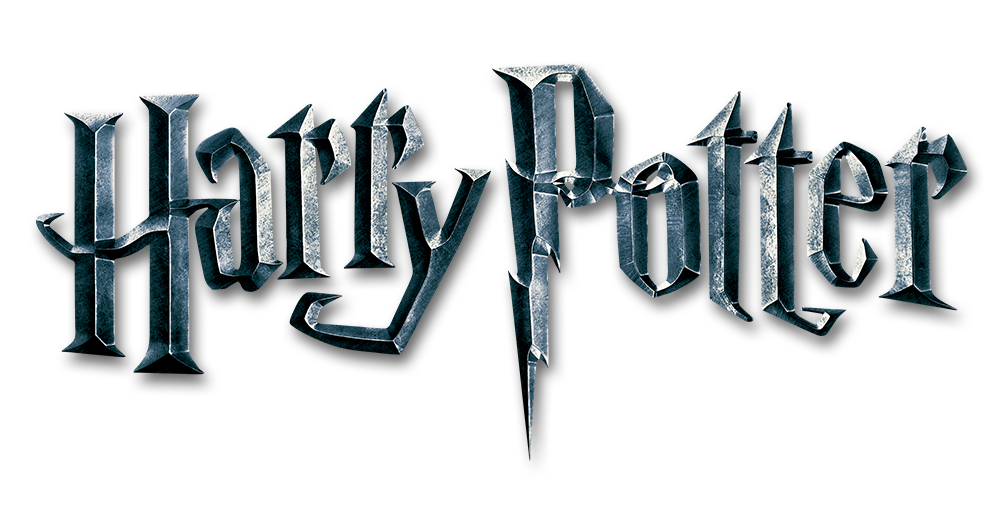

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
import community
import community.community_louvain as community
import math
import random

# Importing Data and Specifying Nodes and Edges

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/SNA M. Phil/characters.csv')

# Extract nodes and mapping
mapping = dict(zip(df['id'], df['label']))

# Remove the 'id' key from the mapping
if 'id' in mapping:
    del mapping['id']

# Extract nodes
nodes = list(mapping.keys())

print('All nodes : ', nodes)
print('Character mapping : ', mapping)

All nodes :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
Character mapping :  {0: 'RAB', 1: 'SB', 2: 'LB', 3: 'CC', 4: 'VS', 5: 'VC', 6: 'BS', 7: 'BJ', 8: 'FD', 9: 'CD', 10: 'AFD', 11: 'AD', 12: 'DD', 13: 'PD', 14: 'VD', 15: 'AF', 16: 'SF', 17: 'NF', 18: 'CF', 19: 'GS', 20: 'GG', 21: 'HG', 22: 'RH', 23: 'IK', 24: 'VK', 25: 'BL', 26: 'AL', 27: 'FL', 28: 'NL', 29: 'LL', 30: 'XL', 31: 'RL', 32: 'DM', 33: 'LM', 34: 'NM', 35: 'OM', 36: 'MG', 37: 'AM', 38: 'PP', 39: 'HP', 40: 'JP', 41: 'LP', 42: 'QQ', 43: 'TS', 44: 'MR', 45: 'LV', 46: 'RS', 47: 'SS', 48: 'NT', 49: 'DU', 50: 'AW', 51: 'BW', 52: 'CW', 53: 'FW', 54: 'GW', 55: 'GIW', 56: 'MW', 57: 'PW', 58: 'RW', 59: 'D', 60: 'F', 61: 'H', 62: 'MM', 63: 'A', 64: 'G'}


In [ ]:
# Load the CSV file into a DataFrame
df1 = pd.read_csv('/content/drive/MyDrive/SNA M. Phil/relations.csv')

# Modify the last column to be 1 if it's '+' and 0 otherwise
df1['type'] = df1['type'].apply(lambda x: 1 if x == '+' else 0)

# Extract edges as a list of tuples
edges = [tuple(row) for row in df1.itertuples(index=False)]

print('All edges : ', edges)

All edges :  [(0, 1, 0), (0, 25, 0), (0, 45, 0), (1, 0, 0), (1, 11, 1), (1, 21, 1), (1, 25, 0), (1, 31, 1), (1, 33, 0), (1, 34, 0), (1, 36, 1), (1, 37, 1), (1, 38, 0), (1, 39, 1), (1, 40, 1), (1, 41, 1), (1, 45, 0), (1, 47, 0), (1, 48, 1), (1, 50, 1), (1, 53, 1), (1, 54, 1), (1, 55, 1), (1, 58, 1), (2, 21, 0), (2, 28, 1), (2, 58, 1), (3, 9, 1), (3, 16, 1), (3, 21, 1), (3, 28, 1), (3, 39, 1), (3, 45, 0), (3, 58, 1), (4, 0, 1), (4, 5, 1), (4, 6, 1), (4, 25, 1), (4, 33, 1), (4, 38, 1), (4, 45, 1), (4, 47, 1), (5, 4, 1), (5, 49, 1), (5, 20, 1), (5, 21, 0), (5, 32, 1), (5, 39, 0), (5, 58, 0), (6, 4, 1), (6, 7, 0), (6, 23, 1), (6, 57, 1), (7, 6, 0), (7, 21, 0), (7, 28, 1), (7, 36, 0), (7, 37, 0), (7, 39, 0), (7, 45, 1), (7, 47, 0), (7, 38, 1), (8, 21, 1), (8, 25, 0), (8, 28, 1), (8, 37, 1), (8, 39, 1), (8, 51, 1), (8, 55, 1), (8, 56, 1), (8, 58, 1), (9, 3, 1), (9, 39, 1), (9, 45, 0), (10, 11, 1), (10, 21, 1), (10, 39, 1), (10, 58, 1), (10, 59, 1), (11, 1, 1), (11, 10, 1), (11, 13, 0), (11, 1

## Assigning Postive and Negative Retionship to Edges

In [ ]:
# Find positive and negative relationship edges
epos = [(u, v) for (u, v, d) in edges if d == 1]
eneg = [(u, v) for (u, v, d) in edges if d == 0]

print('Positive relationship edges : ', epos)
print('Negative relationship edges : ', eneg)

Positive relationship edges :  [(1, 11), (1, 21), (1, 31), (1, 36), (1, 37), (1, 39), (1, 40), (1, 41), (1, 48), (1, 50), (1, 53), (1, 54), (1, 55), (1, 58), (2, 28), (2, 58), (3, 9), (3, 16), (3, 21), (3, 28), (3, 39), (3, 58), (4, 0), (4, 5), (4, 6), (4, 25), (4, 33), (4, 38), (4, 45), (4, 47), (5, 4), (5, 49), (5, 20), (5, 32), (6, 4), (6, 23), (6, 57), (7, 28), (7, 45), (7, 38), (8, 21), (8, 28), (8, 37), (8, 39), (8, 51), (8, 55), (8, 56), (8, 58), (9, 3), (9, 39), (10, 11), (10, 21), (10, 39), (10, 58), (10, 59), (11, 1), (11, 10), (11, 21), (11, 22), (11, 31), (11, 36), (11, 36), (11, 37), (11, 39), (11, 40), (11, 41), (11, 47), (11, 50), (11, 51), (11, 52), (11, 53), (11, 54), (11, 55), (11, 56), (11, 57), (11, 58), (12, 12), (12, 14), (13, 12), (13, 13), (14, 12), (14, 13), (15, 11), (15, 47), (15, 49), (16, 2), (16, 3), (16, 21), (16, 28), (16, 29), (16, 39), (16, 55), (16, 58), (17, 11), (18, 33), (18, 49), (18, 57), (19, 4), (19, 20), (19, 45), (20, 19), (20, 5), (20, 32), 

# Constructing Graph for Network Analysis using Network X Library





In [ ]:
# construct the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

In [ ]:
# Create a list of nodes with the top 5 highest degrees
top_nodes = sorted(G.nodes, key=lambda x: -len(list(G.neighbors(x))))[:5]

# Set node size based on degree, making nodes with high degree larger
node_sizes = [350 if node not in top_nodes else 800 for node in G.nodes]


## 1. Graph Shows Both '+' and '-' Relationship in Circular Layout Graph.


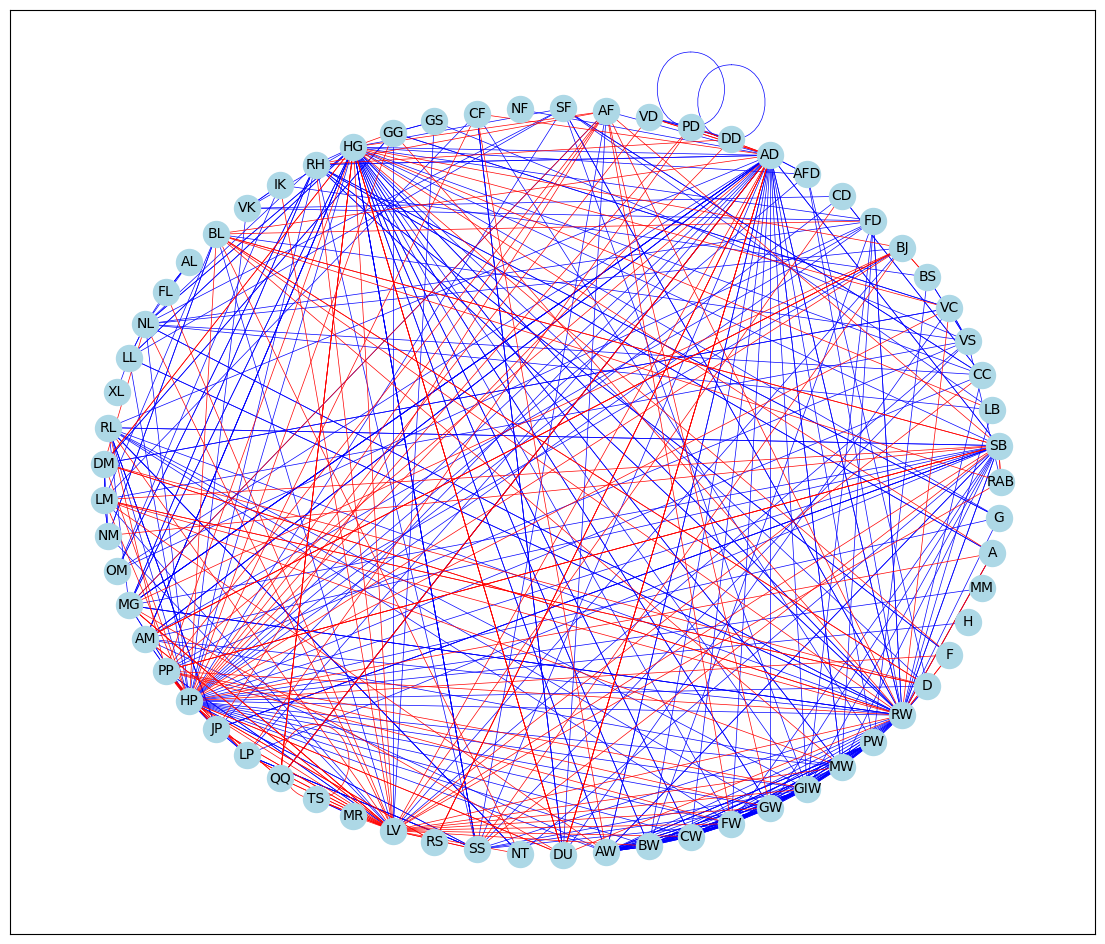

In [ ]:
# Drawing graph with "+" and "-" relationships
# draw the graph using the pyplot library
plt.figure(figsize=(14,12))
# draw the nodes
nx.draw_networkx_nodes(G, nx.circular_layout(G), node_size=350, node_color= 'lightblue')
# draw the positive relationship edges in BLUE
nx.draw_networkx_edges(G, nx.circular_layout(G), edgelist=epos, edge_color='b', width=0.5)
# draw the negative relationship edges in RED
nx.draw_networkx_edges(G, nx.circular_layout(G), edgelist=eneg, edge_color='r', width=0.5)
# add the character names from the mapping as labels
nx.draw_networkx_labels(G, nx.circular_layout(G), labels = mapping, font_size=10)
# display the plot
plt.show()

## 2. Graph Shows Both '+' and '-' Relationship in Dual Circular Layout Graph with Top 5 important Nodes inside the Circle.

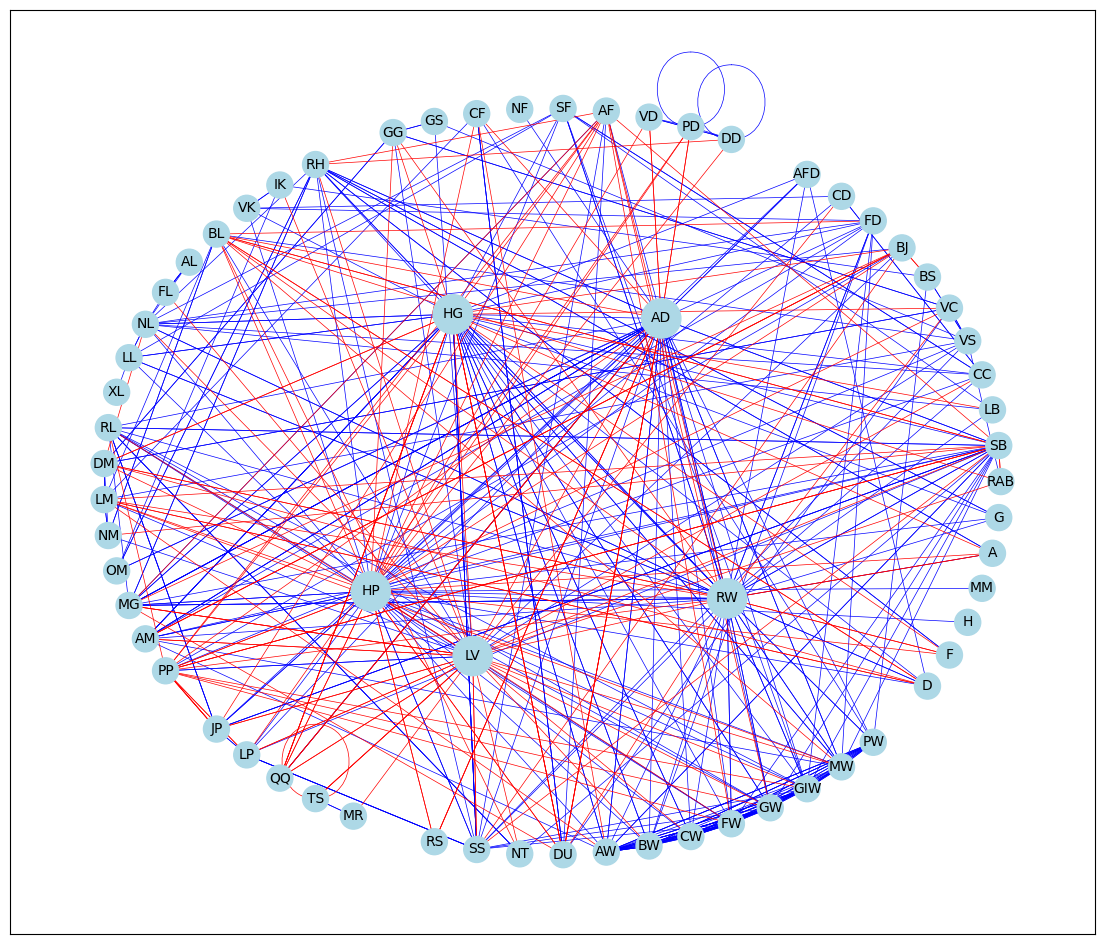

In [ ]:
# Create a dual circular layout
inner_radius = 1.0
outer_radius = 2.0
num_nodes = len(G)

# Calculate angles for the nodes
inner_angles = [2 * math.pi * i / num_nodes for i in range(num_nodes)]
outer_angles = [2 * math.pi * i / num_nodes for i in range(num_nodes)]

# Calculate positions for the nodes
pos = {}
for i, node in enumerate(G.nodes):
    x_inner = inner_radius * math.cos(inner_angles[i])
    y_inner = inner_radius * math.sin(inner_angles[i])
    x_outer = outer_radius * math.cos(outer_angles[i])
    y_outer = outer_radius * math.sin(outer_angles[i])
    pos[node] = (x_inner, y_inner) if node in top_nodes else (x_outer, y_outer)

plt.figure(figsize=(14, 12))

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')

# Draw the positive relationship edges in BLUE
nx.draw_networkx_edges(G, pos, edgelist=epos, edge_color='b', width=0.5)

# Draw the negative relationship edges in RED
nx.draw_networkx_edges(G, pos, edgelist=eneg, edge_color='r', width=0.5)

# Add the character names from the mapping as labels
nx.draw_networkx_labels(G, pos, labels=mapping, font_size=10)

# Display the plot
plt.show()

## 3. Graph Shows only '+' Relationship in Dual Circular Layout Graph with Top 5 important Nodes inside the Circle.

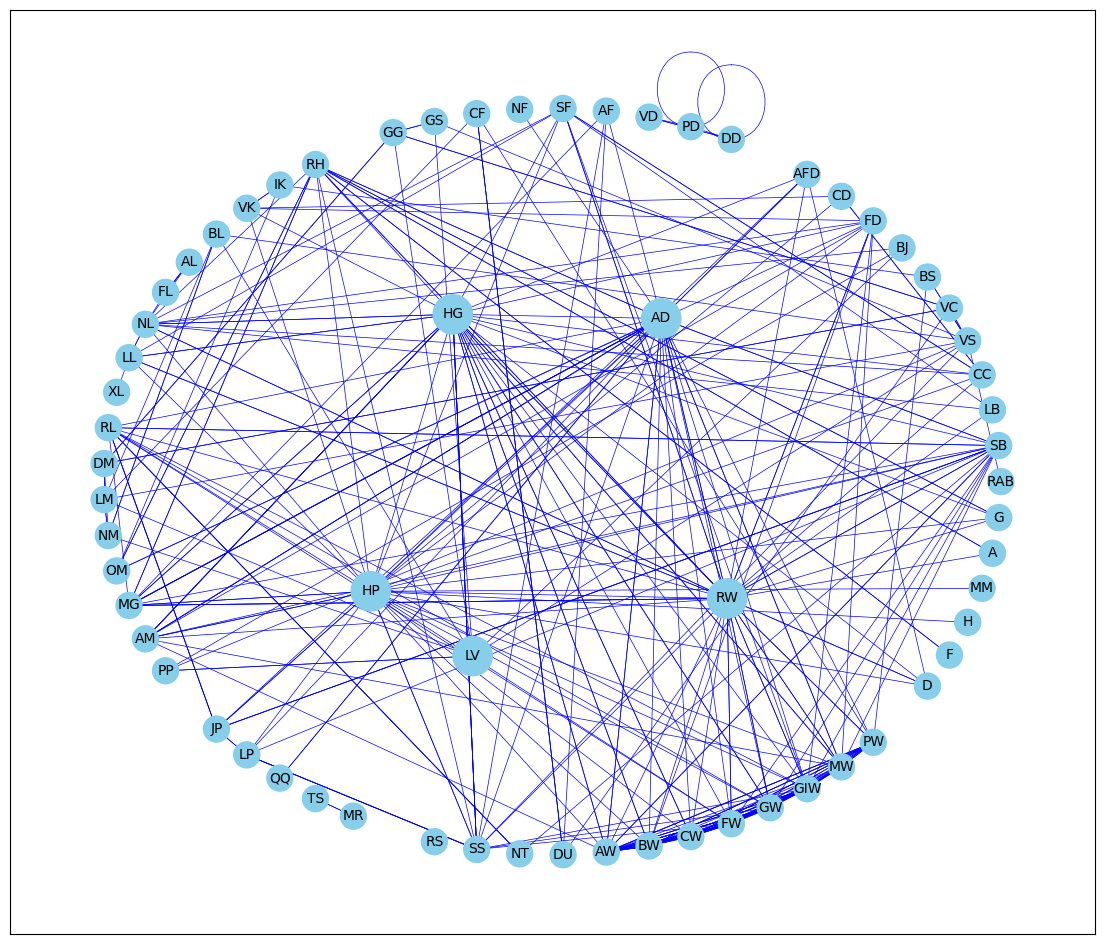

In [ ]:
# Create a dual circular layout
inner_radius = 1.0
outer_radius = 2.0
num_nodes = len(G)

# Calculate angles for the nodes
inner_angles = [2 * math.pi * i / num_nodes for i in range(num_nodes)]
outer_angles = [2 * math.pi * i / num_nodes for i in range(num_nodes)]

# Calculate positions for the nodes
pos = {}
for i, node in enumerate(G.nodes):
    x_inner = inner_radius * math.cos(inner_angles[i])
    y_inner = inner_radius * math.sin(inner_angles[i])
    x_outer = outer_radius * math.cos(outer_angles[i])
    y_outer = outer_radius * math.sin(outer_angles[i])
    pos[node] = (x_inner, y_inner) if node in top_nodes else (x_outer, y_outer)

plt.figure(figsize=(14, 12))

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
# Draw the positive relationship edges in BLUE
nx.draw_networkx_edges(G, pos, edgelist=epos, edge_color='b', width=0.5)
# Add the character names from the mapping as labels
nx.draw_networkx_labels(G, pos, labels=mapping, font_size=10)
# Display the plot
plt.show()

## 4. Graph Shows only '-' Relationship in Dual Circular Layout Graph with Top 5 important Nodes inside the Circle.

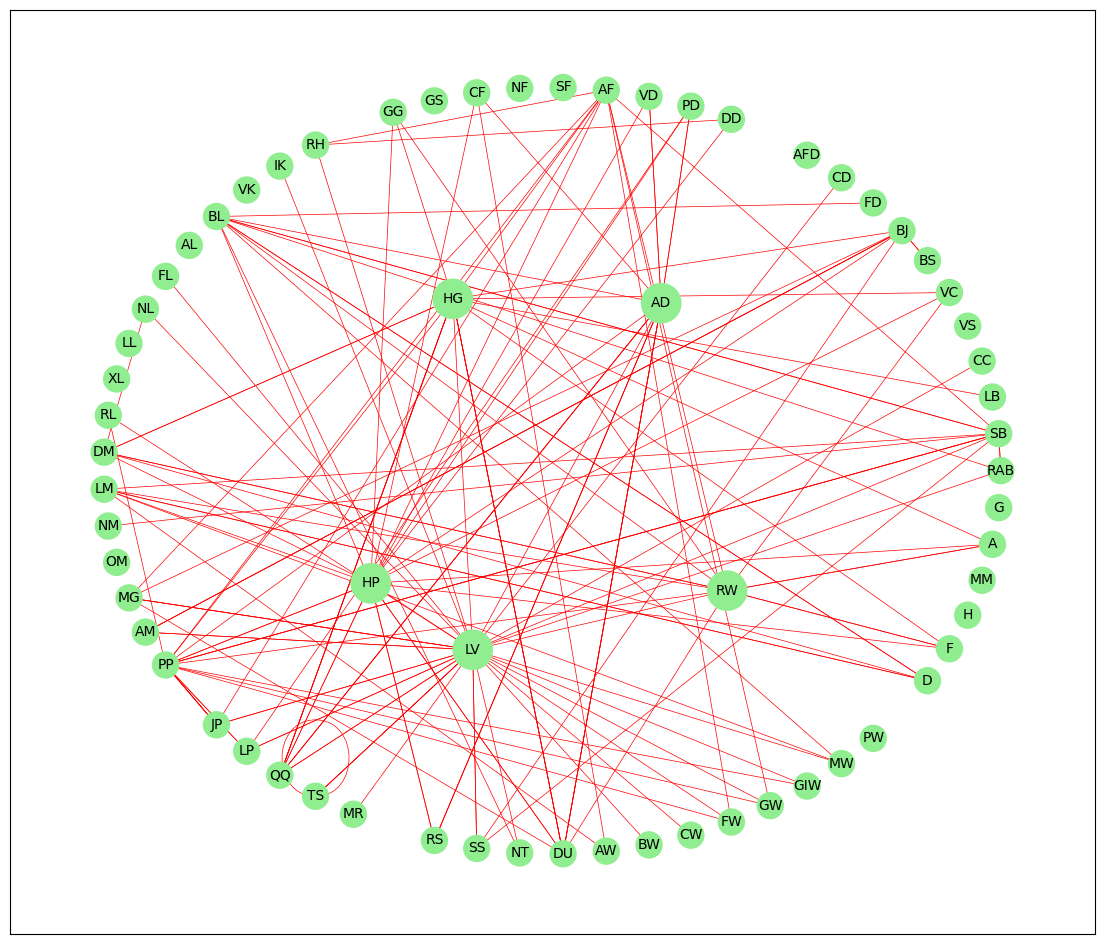

In [ ]:
# Create a dual circular layout
inner_radius = 1.0
outer_radius = 2.0
num_nodes = len(G)

# Calculate angles for the nodes
inner_angles = [2 * math.pi * i / num_nodes for i in range(num_nodes)]
outer_angles = [2 * math.pi * i / num_nodes for i in range(num_nodes)]

# Calculate positions for the nodes
pos = {}
for i, node in enumerate(G.nodes):
    x_inner = inner_radius * math.cos(inner_angles[i])
    y_inner = inner_radius * math.sin(inner_angles[i])
    x_outer = outer_radius * math.cos(outer_angles[i])
    y_outer = outer_radius * math.sin(outer_angles[i])
    pos[node] = (x_inner, y_inner) if node in top_nodes else (x_outer, y_outer)

plt.figure(figsize=(14, 12))

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightgreen')

# Draw the negative relationship edges in RED
nx.draw_networkx_edges(G, pos, edgelist=eneg, edge_color='r', width=0.5)

# Add the character names from the mapping as labels
nx.draw_networkx_labels(G, pos, labels=mapping, font_size=10)

# Display the plot
plt.show()

# Analysis of Network using SNA Metrics

In [ ]:
# Information about the graph
num_nodes = len(G)
num_edges = G.number_of_edges()
density = nx.density(G)
degree_centrality = max(nx.degree_centrality(G).values())
network_diameter = nx.diameter(G)


print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print(f"Graph Density: {density:.3f}")
print("Degree centrality:", degree_centrality)
print(f"Network Diameter: {network_diameter}")

Number of nodes: 65
Number of edges: 333
Graph Density: 0.160
Degree centrality: 0.75
Network Diameter: 4


## Degree of 10 Nodes with Highest Degree

In [ ]:
# Calculate the degree for all nodes
degree = dict(G.degree())
sorted_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)
top_degree_nodes = sorted_degree[:10]

print("Top 10 nodes with highest degree:")
for i, (node, degree) in enumerate(top_degree_nodes, 1):
    print(f"{i}. Node: {node}, Degree: {round(degree, 3)}")

Top 10 nodes with highest degree:
1. Node: 39, Degree: 48
2. Node: 58, Degree: 37
3. Node: 21, Degree: 36
4. Node: 45, Degree: 36
5. Node: 11, Degree: 32
6. Node: 1, Degree: 23
7. Node: 55, Degree: 18
8. Node: 53, Degree: 17
9. Node: 54, Degree: 17
10. Node: 56, Degree: 17


## Btweenness Centrality of 10 Nodes with Highest Btweenness Centrality

In [ ]:
# Calculate Betweenness Centrality for all nodes
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_betweenness_nodes = sorted_betweenness[:10]

print("\nTop 10 nodes with highest Betweenness Centrality:")
for i, (node, betweenness) in enumerate(top_betweenness_nodes, 1):
    print(f"{i}. Node: {node}, Betweenness Centrality: {round(betweenness, 3)}")


Top 10 nodes with highest Betweenness Centrality:
1. Node: 39, Betweenness Centrality: 0.282
2. Node: 45, Betweenness Centrality: 0.203
3. Node: 11, Betweenness Centrality: 0.1
4. Node: 58, Betweenness Centrality: 0.099
5. Node: 21, Betweenness Centrality: 0.094
6. Node: 28, Betweenness Centrality: 0.045
7. Node: 29, Betweenness Centrality: 0.031
8. Node: 1, Betweenness Centrality: 0.028
9. Node: 22, Betweenness Centrality: 0.019
10. Node: 25, Betweenness Centrality: 0.017


## Closeness Centrality of 10 Nodes with Highest Closeness Centrality

In [ ]:
# Calculate Closeness Centrality for all nodes
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
top_closeness_nodes = sorted_closeness[:10]

print("\nTop 10 nodes with highest Closeness Centrality:")
for i, (node, closeness) in enumerate(top_closeness_nodes, 1):
    print(f"{i}. Node: {node}, Closeness Centrality: {round(closeness, 3)}")


Top 10 nodes with highest Closeness Centrality:
1. Node: 39, Closeness Centrality: 0.8
2. Node: 58, Closeness Centrality: 0.703
3. Node: 21, Closeness Centrality: 0.696
4. Node: 45, Closeness Centrality: 0.688
5. Node: 11, Closeness Centrality: 0.653
6. Node: 1, Closeness Centrality: 0.593
7. Node: 55, Closeness Centrality: 0.571
8. Node: 53, Closeness Centrality: 0.566
9. Node: 54, Closeness Centrality: 0.566
10. Node: 56, Closeness Centrality: 0.566


## Global Clustering Coefficient of the Network

In [ ]:
# Calculate the global clustering coefficient
global_clustering_coefficient = nx.average_clustering(G)

print(f"Global Clustering Coefficient: {global_clustering_coefficient:.3f}")

Global Clustering Coefficient: 0.612


## Finding Closed Triplets, Open Triplets and Total Triplets in Network

In [ ]:
# Calculate the total number of closed triplets
total_closed_triplets = sum(nx.triangles(G).values()) / 3

# Calculate the total number of triplets
total_triplets = sum(nx.triangles(G).values())

# Calculate the total number of open triplets
total_open_triplets = total_triplets - total_closed_triplets

print(f"Total Closed Triplets: {total_closed_triplets:.0f}")
print(f"Total Triplets: {total_triplets:.0f}")
print(f"Total Open Triplets: {total_open_triplets:.0f}")

Total Closed Triplets: 820
Total Triplets: 2460
Total Open Triplets: 1640


## Binary Global Clustering Coefficient of the Network

In [ ]:
# Calculate the Binary Global Clustering Coefficient
binary_global_clustering_coefficient = nx.transitivity(G)

print(f"Binary Global Clustering Coefficient: {binary_global_clustering_coefficient:.3f}")

Binary Global Clustering Coefficient: 0.413


## Binary Local Clustering Coefficients of all nodes of the Network

In [ ]:
# Calculate the binary local clustering coefficients for all nodes
binary_local_clustering_coefficients = nx.clustering(G, nodes=G.nodes, weight=None)

# Print the binary local clustering coefficients for all nodes
for node, coefficient in binary_local_clustering_coefficients.items():
    print(f"Node {node}: Binary Local Clustering Coefficient: {coefficient:.3f}")

Node 0: Binary Local Clustering Coefficient: 0.833
Node 1: Binary Local Clustering Coefficient: 0.478
Node 2: Binary Local Clustering Coefficient: 1.000
Node 3: Binary Local Clustering Coefficient: 0.762
Node 4: Binary Local Clustering Coefficient: 0.222
Node 5: Binary Local Clustering Coefficient: 0.619
Node 6: Binary Local Clustering Coefficient: 0.000
Node 7: Binary Local Clustering Coefficient: 0.500
Node 8: Binary Local Clustering Coefficient: 0.491
Node 9: Binary Local Clustering Coefficient: 0.667
Node 10: Binary Local Clustering Coefficient: 0.900
Node 11: Binary Local Clustering Coefficient: 0.327
Node 12: Binary Local Clustering Coefficient: 0.667
Node 13: Binary Local Clustering Coefficient: 0.700
Node 14: Binary Local Clustering Coefficient: 0.833
Node 15: Binary Local Clustering Coefficient: 0.705
Node 16: Binary Local Clustering Coefficient: 0.714
Node 17: Binary Local Clustering Coefficient: 0.000
Node 18: Binary Local Clustering Coefficient: 0.600
Node 19: Binary Local 

## Finding Communities in the Network

In [ ]:
# Finding communities using the Louvain method
partition = community.best_partition(G)
values = list(partition.values())

In [ ]:
# Print the communities
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = [node]
    else:
        communities[community_id].append(node)

for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")

Community 2: [0, 4, 5, 6, 7, 18, 19, 20, 23, 25, 32, 33, 34, 35, 38, 45, 49]
Community 1: [1, 11, 15, 17, 31, 36, 40, 41, 42, 47, 48]
Community 0: [2, 3, 8, 9, 10, 16, 21, 22, 24, 26, 27, 28, 29, 30, 37, 39, 58, 59, 60, 61, 62, 63, 64]
Community 6: [12, 13, 14]
Community 3: [43, 44]
Community 4: [46]
Community 5: [50, 51, 52, 53, 54, 55, 56, 57]


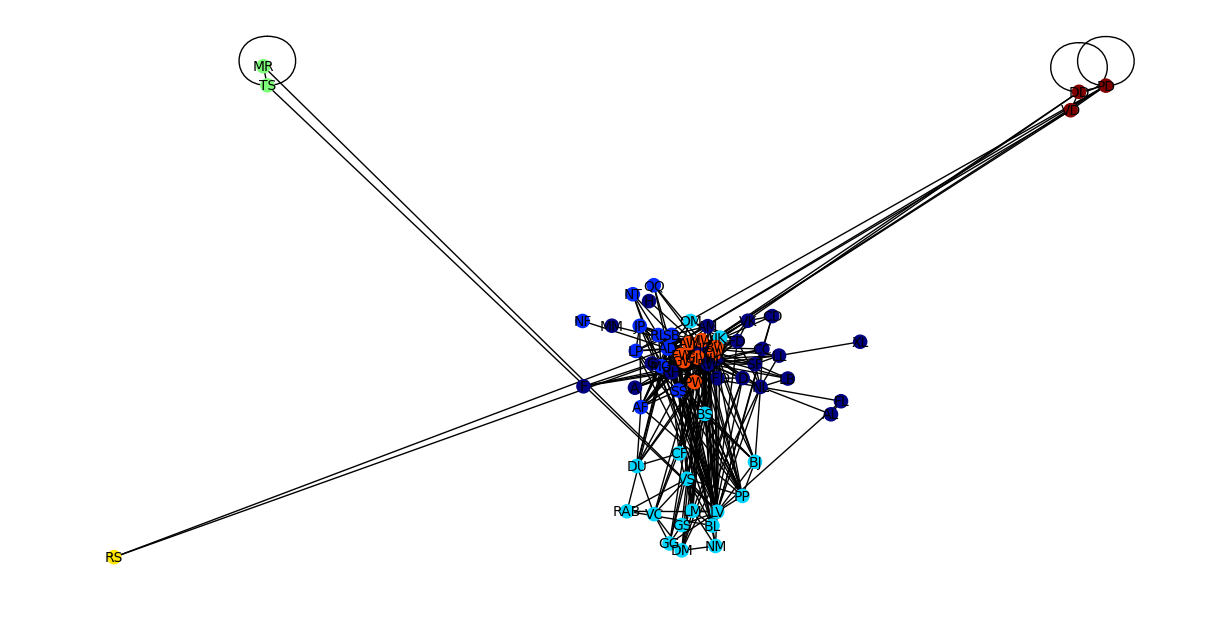

In [ ]:
# Replace node labels with character names from the mapping
labels = {node: mapping[node] for node in G.nodes()}
# Ploting Community Graph
plt.figure(figsize=(12, 6))
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values, node_size=90, labels=labels, font_size=10, with_labels=True)
plt.show()

In [ ]:
# Calculate modularity based on the partition
modularity = community.modularity(partition, G)

print(f"Modularity: {modularity:.3f}")

Modularity: 0.381


In [ ]:
# Create a dictionary to store nodes in each modularity class
modularity_classes = {}

for node, community_id in partition.items():
    if community_id not in modularity_classes:
        modularity_classes[community_id] = [node]
    else:
        modularity_classes[community_id].append(node)

# Print the nodes in each modularity class
for community_id, nodes in modularity_classes.items():
    print(f"Modularity Class {community_id}: {nodes}")

Modularity Class 2: [0, 4, 5, 6, 7, 18, 19, 20, 23, 25, 32, 33, 34, 35, 38, 45, 49]
Modularity Class 1: [1, 11, 15, 17, 31, 36, 40, 41, 42, 47, 48]
Modularity Class 0: [2, 3, 8, 9, 10, 16, 21, 22, 24, 26, 27, 28, 29, 30, 37, 39, 58, 59, 60, 61, 62, 63, 64]
Modularity Class 6: [12, 13, 14]
Modularity Class 3: [43, 44]
Modularity Class 4: [46]
Modularity Class 5: [50, 51, 52, 53, 54, 55, 56, 57]


In [ ]:
# Create a list of subgraphs for each modularity class
subgraphs = []
for community_id, nodes in modularity_classes.items():
    subgraph = G.subgraph(nodes)
    subgraphs.append(subgraph)

# Print the number of nodes and edges in each subgraph
for i, subgraph in enumerate(subgraphs):
    num_nodes = subgraph.number_of_nodes()
    num_edges = subgraph.number_of_edges()
    print(f"Modularity Class {i}: {num_nodes} nodes, {num_edges} edges")

Modularity Class 0: 17 nodes, 34 edges
Modularity Class 1: 11 nodes, 24 edges
Modularity Class 2: 23 nodes, 67 edges
Modularity Class 3: 3 nodes, 5 edges
Modularity Class 4: 2 nodes, 2 edges
Modularity Class 5: 1 nodes, 0 edges
Modularity Class 6: 8 nodes, 28 edges


## Graph of Each Communities

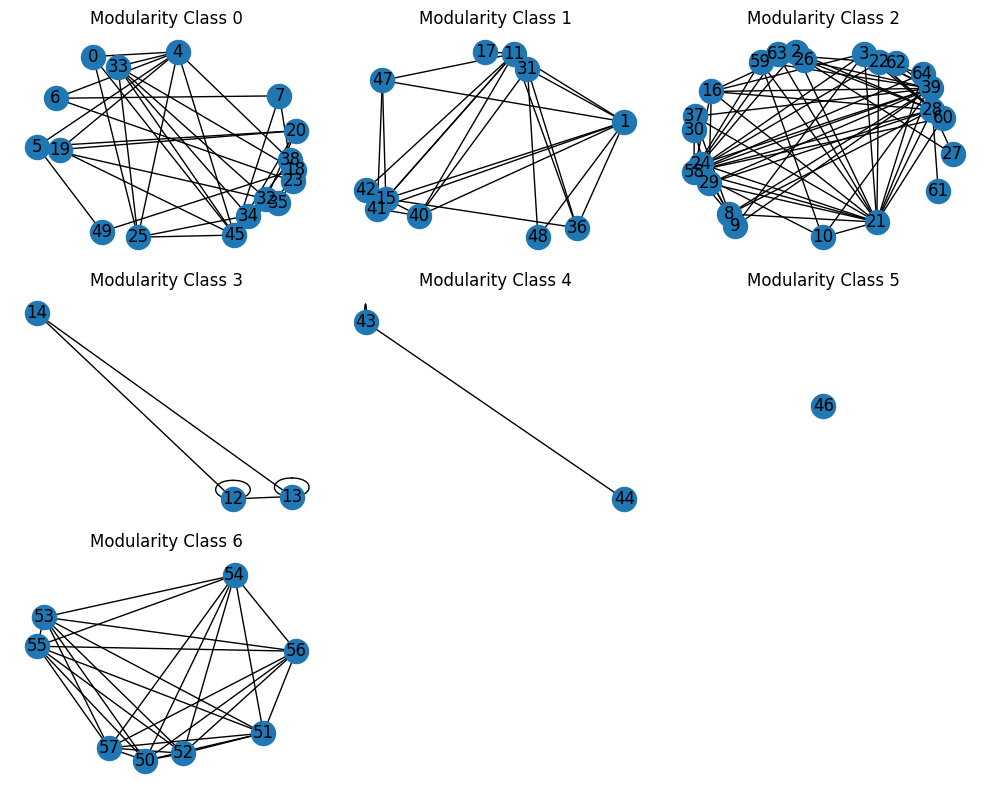

In [ ]:
# Create a visual representation of each subgraph
plt.figure(figsize=(10, 8))
pos2 = nx.spring_layout(G, k=100)

for i, subgraph in enumerate(subgraphs):
    plt.subplot(3, 3, i + 1)  # Assuming you have up to 9 modularity classes
    nx.draw(subgraph, pos2, with_labels=True)
    plt.title(f"Modularity Class {i}")

plt.tight_layout()
plt.show()

## Graph of Communities with labels

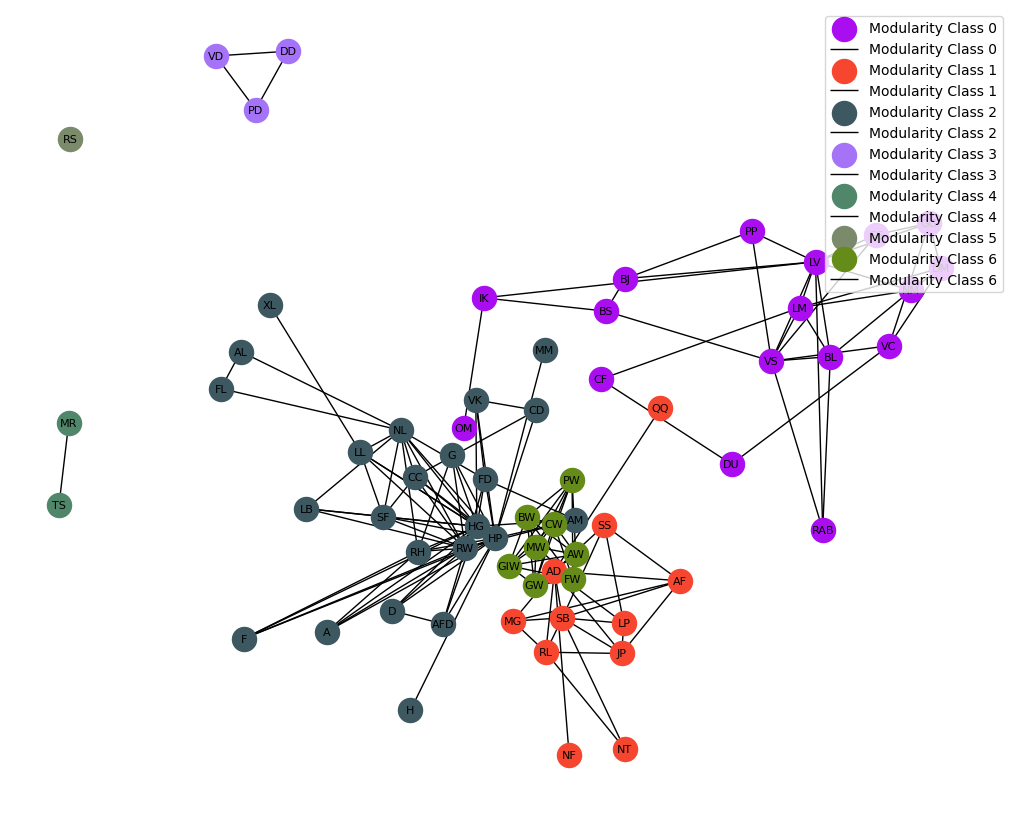

In [ ]:
# Create a visual representation of the network graph with different colors for modularity classes
plt.figure(figsize=(10, 8))

# Assign different colors to nodes in the same modularity class
colors = [f'#{random.randint(0, 16777215):06x}' for _ in range(len(modularity_classes))]

# Use a force-directed layout for better node positioning
pos3 = nx.spring_layout(G, k=0.350, seed=500, weight='weight')

labels = {}
for node, label in mapping.items():
    if node in G.nodes():
        labels[node] = label

for i, (community_id, nodes) in enumerate(modularity_classes.items()):
    subgraph = G.subgraph(nodes)
    nx.draw(subgraph, pos3, with_labels=False, node_color=colors[i], label=f"Modularity Class {i}")

nx.draw_networkx_labels(G, pos3, labels, font_size=8)

plt.legend(loc='upper right')
#plt.tight_layout()
plt.show()

## Graph of Communities with Links

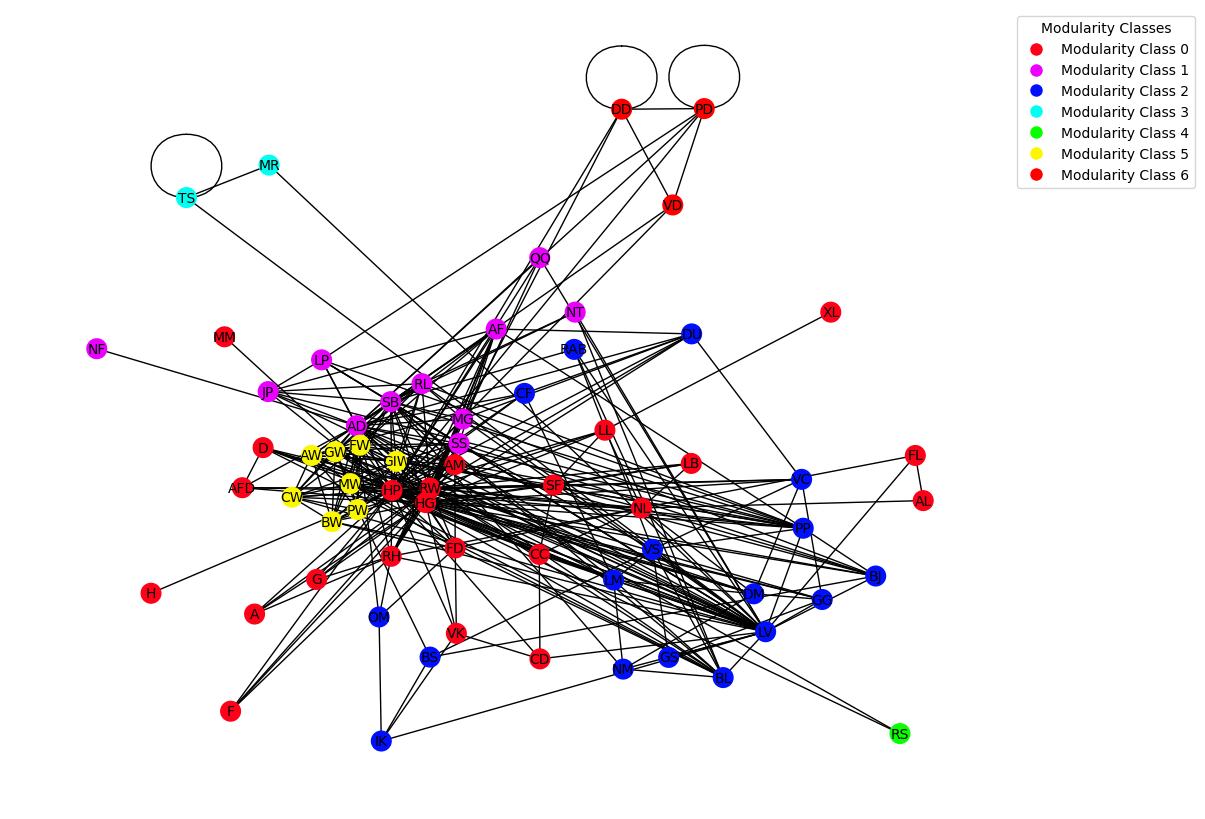

In [ ]:
# Replace node labels with character names from the mapping
labels1 = {node: mapping[node] for node in G.nodes()}

# Create a color map for modularity classes
modularity_classes = list(set(partition.values()))
num_colors = len(modularity_classes)
color_map = plt.get_cmap('hsv_r',num_colors)

node_colors = [color_map(modularity_classes.index(partition[node]) / num_colors) for node in G.nodes()]

# Use a force-directed layout to reduce overlapping
pos4 = nx.spring_layout(G, k=0.475, seed=80, weight='weight')

plt.figure(figsize=(10, 8))
nx.draw(G, pos4, node_color=node_colors, node_size=200, labels=labels1, font_size=10, with_labels=True, cmap=color_map)

# Create a legend for modularity classes
legend_labels = {str(i): f"Modularity Class {i}" for i in modularity_classes}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color_map(int(label) / num_colors)) for label in legend_labels]

plt.legend(handles=legend_handles, labels=legend_labels.values(), title='Modularity Classes', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()